In [1]:
from os import path

import sys
sys.path.append(path.join("..", "notebooks"))
sys.path.append(path.join("..", "notebooks", "utils.py"))
import utils

import openTSNE

import anndata
import numpy as np
import pandas as pd
import string

import matplotlib.pyplot as plt

# Baron

In [2]:
adata_3000 = anndata.read_h5ad("baron_embedding_tsne_3000_genes.h5ad")

In [3]:
%%time
"""
affinities = openTSNE.affinity.PerplexityBasedNN(
    adata_3000.obsm["pca"],
    perplexity=30,
    metric="cosine",
    n_jobs=8,
    random_state=0,
)
init = openTSNE.initialization.random(adata_3000.obsm["pca"], random_state=0)
embedding = openTSNE.TSNEEmbedding(
    init,
    affinities,
    negative_gradient_method="fft",
    n_jobs=8,
)
embedding.optimize(n_iter=250, exaggeration=12, momentum=0.5, inplace=True)
embedding.optimize(n_iter=750, exaggeration=1, momentum=0.8, inplace=True)

adata_3000.obsm["tsne_default"] = embedding
adata_3000.write_h5ad("baron_embedding_tsne_3000_genes.h5ad")
"""

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 7.63 µs


'\naffinities = openTSNE.affinity.PerplexityBasedNN(\n    adata_3000.obsm["pca"],\n    perplexity=30,\n    metric="cosine",\n    n_jobs=8,\n    random_state=0,\n)\ninit = openTSNE.initialization.random(adata_3000.obsm["pca"], random_state=0)\nembedding = openTSNE.TSNEEmbedding(\n    init,\n    affinities,\n    negative_gradient_method="fft",\n    n_jobs=8,\n)\nembedding.optimize(n_iter=250, exaggeration=12, momentum=0.5, inplace=True)\nembedding.optimize(n_iter=750, exaggeration=1, momentum=0.8, inplace=True)\n\nadata_3000.obsm["tsne_default"] = embedding\nadata_3000.write_h5ad("baron_embedding_tsne_3000_genes.h5ad")\n'

In [4]:
colors = utils.get_colors_for(adata_3000)

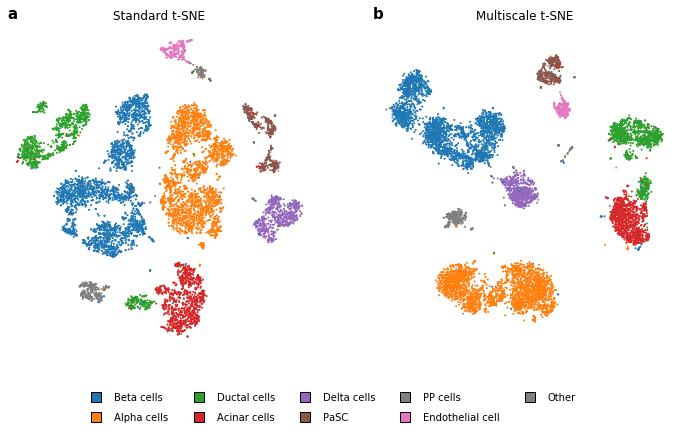

In [5]:
cell_order = list(colors.keys())
num_cell_types = len(np.unique(adata_3000.obs["labels"]))

fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

utils.plot(adata_3000.obsm["tsne_default"], adata_3000.obs["labels"],  s=1, colors=colors, draw_legend=False, ax=ax[0], alpha=1, title="Standard t-SNE", label_order=cell_order)
utils.plot(adata_3000.obsm["tsne"], adata_3000.obs["labels"], s=1, colors=colors, draw_legend=True, ax=ax[1], alpha=1, title="Multiscale t-SNE", label_order=cell_order,
          legend_kwargs=dict(loc="upper center", bbox_to_anchor=(0.5, 0.05), bbox_transform=fig.transFigure, labelspacing=1, ncol=num_cell_types // 2 + 1))

for ax_, letter in zip(ax, string.ascii_lowercase): 
    plt.text(0, 1.02, letter, transform=ax_.transAxes, fontsize=15, fontweight="bold")

for ax_ in ax: ax_.axis("equal")

plt.savefig("baron_multiscale_tsne.pdf", dpi=600, bbox_inches="tight", transparent=True)

# Hrvatin

In [6]:
adata_3000 = anndata.read_h5ad("hrvatin_embedding_tsne_3000_genes.h5ad")

In [7]:
%%time
"""
affinities = openTSNE.affinity.PerplexityBasedNN(
    adata_3000.obsm["pca"],
    perplexity=30,
    metric="cosine",
    n_jobs=8,
    random_state=0,
)
init = openTSNE.initialization.random(adata_3000.obsm["pca"], random_state=0)
embedding = openTSNE.TSNEEmbedding(
    init,
    affinities,
    negative_gradient_method="fft",
    n_jobs=8,
)
embedding.optimize(n_iter=250, exaggeration=12, momentum=0.5, inplace=True)
embedding.optimize(n_iter=750, exaggeration=1, momentum=0.8, inplace=True)

adata_3000.obsm["tsne_default"] = embedding
adata_3000.write_h5ad("hrvatin_embedding_tsne_3000_genes.h5ad")
"""

CPU times: user 229 µs, sys: 37 µs, total: 266 µs
Wall time: 11.7 µs


'\naffinities = openTSNE.affinity.PerplexityBasedNN(\n    adata_3000.obsm["pca"],\n    perplexity=30,\n    metric="cosine",\n    n_jobs=8,\n    random_state=0,\n)\ninit = openTSNE.initialization.random(adata_3000.obsm["pca"], random_state=0)\nembedding = openTSNE.TSNEEmbedding(\n    init,\n    affinities,\n    negative_gradient_method="fft",\n    n_jobs=8,\n)\nembedding.optimize(n_iter=250, exaggeration=12, momentum=0.5, inplace=True)\nembedding.optimize(n_iter=750, exaggeration=1, momentum=0.8, inplace=True)\n\nadata_3000.obsm["tsne_default"] = embedding\nadata_3000.write_h5ad("hrvatin_embedding_tsne_3000_genes.h5ad")\n'

In [8]:
colors = utils.get_colors_for(adata_3000)

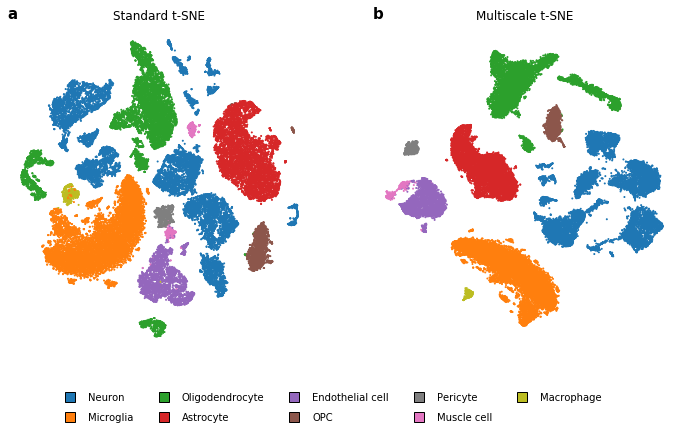

In [9]:
cell_order = list(colors.keys())
num_cell_types = len(np.unique(adata_3000.obs["labels"]))

fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

utils.plot(adata_3000.obsm["tsne_default"], adata_3000.obs["labels"],  s=1, colors=colors, draw_legend=False, ax=ax[0], alpha=1, title="Standard t-SNE", label_order=cell_order)
utils.plot(adata_3000.obsm["tsne"], adata_3000.obs["labels"], s=1, colors=colors, draw_legend=True, ax=ax[1], alpha=1, title="Multiscale t-SNE", label_order=cell_order,
          legend_kwargs=dict(loc="upper center", bbox_to_anchor=(0.5, 0.05), bbox_transform=fig.transFigure, labelspacing=1, ncol=num_cell_types // 2 + 1))

for ax_, letter in zip(ax, string.ascii_lowercase): 
    plt.text(0, 1.02, letter, transform=ax_.transAxes, fontsize=15, fontweight="bold")

for ax_ in ax: ax_.axis("equal")

plt.savefig("hrvatin_multiscale_tsne.pdf", dpi=600, bbox_inches="tight", transparent=True)

# Macosko

In [10]:
adata_3000 = anndata.read_h5ad("macosko_embedding_tsne_3000_genes.h5ad")

In [11]:
colors = utils.MACOSKO_COLORS

In [12]:
%%time
"""
affinities = openTSNE.affinity.PerplexityBasedNN(
    adata_3000.obsm["pca"],
    perplexity=30,
    metric="cosine",
    n_jobs=8,
    random_state=0,
)
init = openTSNE.initialization.random(adata_3000.obsm["pca"], random_state=3)
embedding = openTSNE.TSNEEmbedding(
    init,
    affinities,
    negative_gradient_method="fft",
    n_jobs=8,
)
embedding.optimize(n_iter=250, exaggeration=12, momentum=0.5, inplace=True)
embedding.optimize(n_iter=750, exaggeration=1, momentum=0.8, inplace=True)

adata_3000.obsm["tsne_default"] = embedding
adata_3000.write_h5ad("macosko_embedding_tsne_3000_genes.h5ad")
"""

CPU times: user 447 µs, sys: 43 µs, total: 490 µs
Wall time: 30 µs


'\naffinities = openTSNE.affinity.PerplexityBasedNN(\n    adata_3000.obsm["pca"],\n    perplexity=30,\n    metric="cosine",\n    n_jobs=8,\n    random_state=0,\n)\ninit = openTSNE.initialization.random(adata_3000.obsm["pca"], random_state=3)\nembedding = openTSNE.TSNEEmbedding(\n    init,\n    affinities,\n    negative_gradient_method="fft",\n    n_jobs=8,\n)\nembedding.optimize(n_iter=250, exaggeration=12, momentum=0.5, inplace=True)\nembedding.optimize(n_iter=750, exaggeration=1, momentum=0.8, inplace=True)\n\nadata_3000.obsm["tsne_default"] = embedding\nadata_3000.write_h5ad("macosko_embedding_tsne_3000_genes.h5ad")\n'

In [13]:
colors = utils.MACOSKO_COLORS

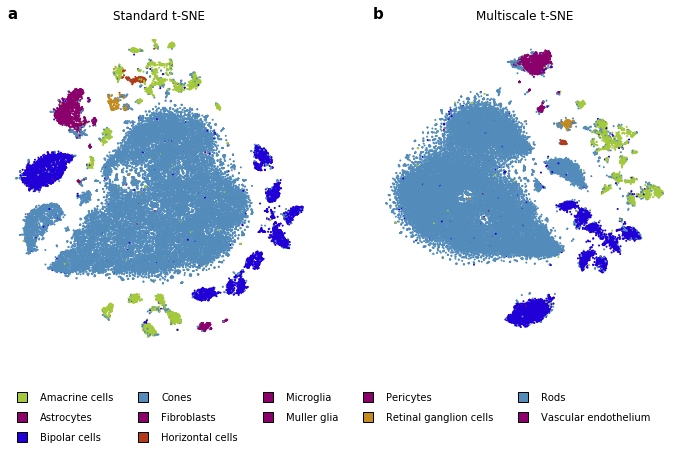

In [14]:
cell_order = list(colors.keys())
num_cell_types = len(np.unique(adata_3000.obs["labels"]))

fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

utils.plot(adata_3000.obsm["tsne_default"], adata_3000.obs["labels"],  s=1, colors=colors, draw_legend=False, ax=ax[0], alpha=1, title="Standard t-SNE", label_order=cell_order)
utils.plot(adata_3000.obsm["tsne"], adata_3000.obs["labels"], s=1, colors=colors, draw_legend=True, ax=ax[1], alpha=1, title="Multiscale t-SNE", label_order=cell_order,
          legend_kwargs=dict(loc="upper center", bbox_to_anchor=(0.5, 0.05), bbox_transform=fig.transFigure, labelspacing=1, ncol=num_cell_types // 3 + 1))

for ax_, letter in zip(ax, string.ascii_lowercase): 
    plt.text(0, 1.02, letter, transform=ax_.transAxes, fontsize=15, fontweight="bold")

for ax_ in ax: ax_.axis("equal")

plt.savefig("macosko_multiscale_tsne.pdf", dpi=600, bbox_inches="tight", transparent=True)